## 	K-means clustering Using Narendra Modi's tweets data
## Author-Rameez Raza


In [ ]:
import nltk
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt

In [2]:
nm_tweets=pd.read_csv("datasets/narendramodi_tweets.csv")
nm_tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [26]:
nm_tweets.shape

(3220, 14)

In [3]:
nm_tweets.isnull().sum()

id                      0
retweets_count          0
favorite_count          0
created_at              0
text                    0
lang                    0
retweeted               0
followers_count         0
friends_count           0
hashtags_count          0
description             0
location                0
background_image_url    0
source                  0
dtype: int64

In [4]:
max_date=nm_tweets["created_at"].max()
max_date

'2017-01-31 11:00:07'

In [6]:
min_date=nm_tweets["created_at"].min()
min_date

'2016-03-09 12:22:10'

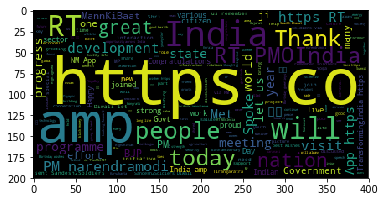

In [12]:
import matplotlib.pyplot as plt
input_string=' '.join(nm_tweets["text"])
wcloud=wc.WordCloud(background_color="Black").generate(input_string)
plt.imshow(wcloud)


In [13]:
## Text Cleaning

In [20]:
docs = nm_tweets['text'].str.lower().str.replace('[^a-z#@ ]', '')
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [21]:
stopwords=nltk.corpus.stopwords.words("english")
len(stopwords)

179

In [24]:
def clean_sentence(text):
    words = text.split(' ')
    stemmer=nltk.stem.PorterStemmer()
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return' '.join(words_clean)

In [25]:
docs_clean=docs.apply(clean_sentence)
docs_clean.shape

(3220,)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
## document term matrix
vectorizer=CountVectorizer(min_df=5)
dtm=vectorizer.fit_transform(docs_clean)
dtm

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [31]:
no_of_zeros=3220*1228-24800
sparcity=(no_of_zeros)/(3220*1228)*100
sparcity

99.372812430453

In [32]:
dtm_df=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
dtm_df.head()

,aadhaar,abeshinzo,abhiyan,absolut,access,accomplish,account,achiev,across,act,...,year,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngster,youth,zay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.cluster import KMeans

In [36]:
model=KMeans(n_clusters=4)
model.fit(dtm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
model.labels_

array([1, 1, 0, ..., 1, 1, 3])

In [38]:
nm_tweets["Clusters"]=model.labels_

In [39]:
nm_tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,Clusters
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,1
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,1
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,0
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,0
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,0


In [45]:
cluster0=pd.DataFrame({"text":nm_tweets[nm_tweets["Clusters"]==0]["text"]})

In [47]:
cluster1=pd.DataFrame({"text":nm_tweets[nm_tweets["Clusters"]==1]["text"]})

In [48]:
cluster2=pd.DataFrame({"text":nm_tweets[nm_tweets["Clusters"]==2]["text"]})

In [50]:
cluster3=pd.DataFrame({"text":nm_tweets[nm_tweets["Clusters"]==3]["text"]})

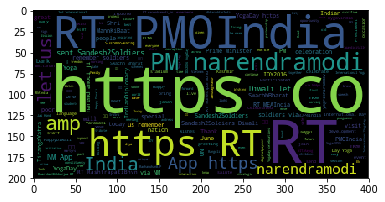

In [52]:
input_string0=" ".join(cluster0["text"])
wcloud0=wc.WordCloud(background_color="black").generate(input_string0)
plt.imshow(wcloud0)

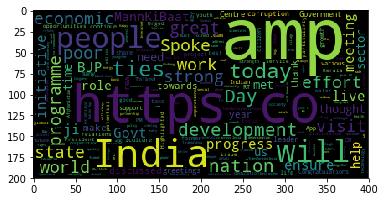

In [53]:
input_string1=" ".join(cluster1["text"])
wcloud1=wc.WordCloud(background_color="black").generate(input_string1)
plt.imshow(wcloud1)

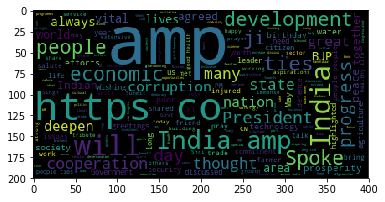

In [54]:
input_string2=" ".join(cluster2["text"])
wcloud2=wc.WordCloud(background_color="black").generate(input_string2)
plt.imshow(wcloud2)

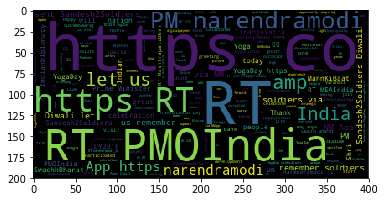

In [55]:
input_string3=" ".join(cluster0["text"])
wcloud3=wc.WordCloud(background_color="black").generate(input_string3)
plt.imshow(wcloud3)